In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [29]:
df = pd.read_csv(r'C:\Users\sinan\Downloads\Auto Sales Data.csv')


In [35]:
df.head(20)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24-02-2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07-05-2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01-07-2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25-08-2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28-10-2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,11-11-2018,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,18-11-2018,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,15-01-2019,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,20-02-2019,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,05-04-2019,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small


In [37]:
df.drop_duplicates(inplace = True)

In [39]:
df.shape

(2747, 20)

In [41]:
total_quantity_sale = df["QUANTITYORDERED"].sum()
print(total_quantity_sale)

96428


C:\Users\sinan\AppData\Local\Temp\ipykernel_1168\1935555545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='QUANTITYORDERED', data=df, palette='viridis')


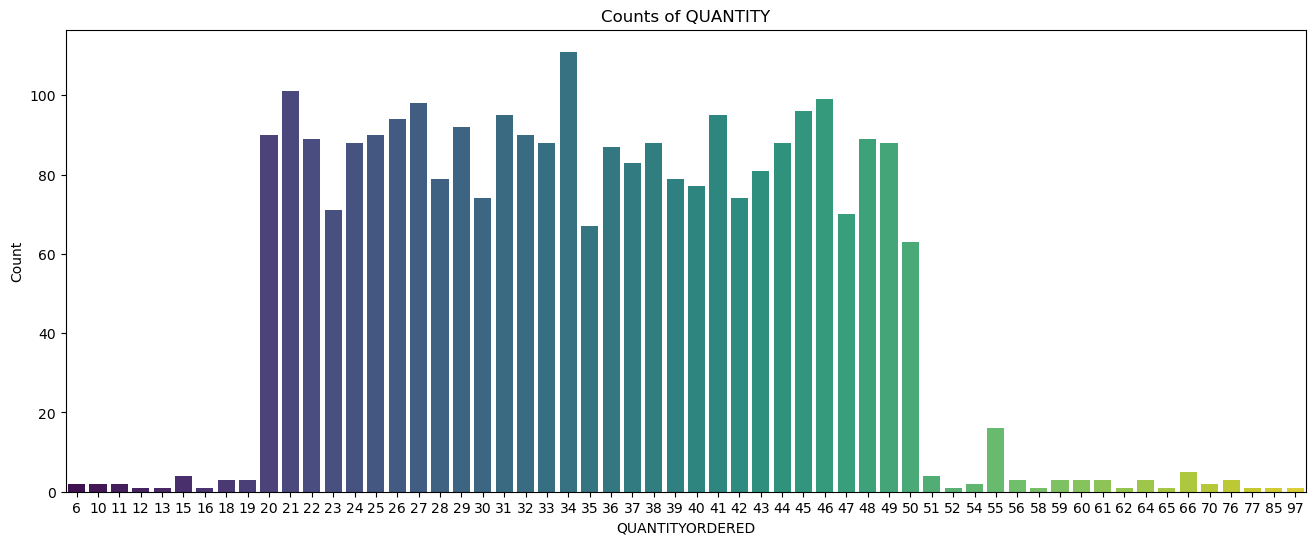

In [43]:
plt.figure(figsize=(16, 6))
sns.countplot(x='QUANTITYORDERED', data=df, palette='viridis')
plt.title('Counts of QUANTITY')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('Count')
plt.show()

In [45]:
Total_quantity_exported_to_countries = df.groupby('COUNTRY')['QUANTITYORDERED'].sum()
print(Total_quantity_exported_to_countries)

COUNTRY
Australia       6246
Austria         1974
Belgium         1074
Canada          2293
Denmark         2197
Finland         3192
France         11090
Germany         2148
Ireland          490
Italy           3773
Japan           1842
Norway          2842
Philippines      961
Singapore       2760
Spain          12429
Sweden          2006
Switzerland     1078
UK              5013
USA            33020
Name: QUANTITYORDERED, dtype: int64


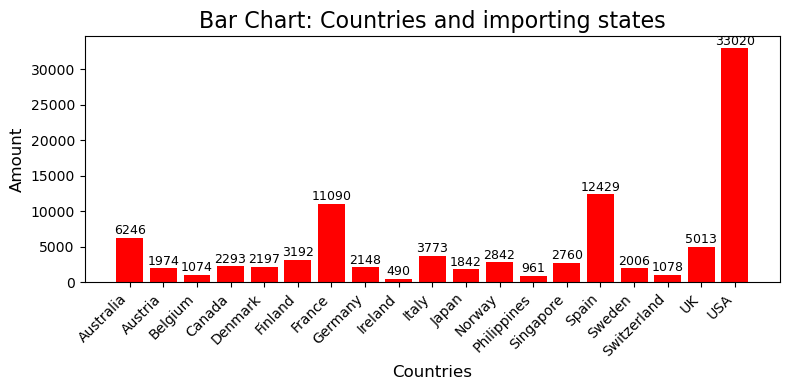

In [47]:
countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
    'France', 'Germany', 'Ireland', 'Italy', 'Japan', 'Norway',
    'Philippines', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'UK', 'USA'
]
amounts = [
    6246, 1974, 1074, 2293, 2197, 3192,
    11090, 2148, 490, 3773, 1842, 2842,
    961, 2760, 12429, 2006, 1078, 5013, 33020
]
plt.figure(figsize=(8, 4))
plt.bar(countries, amounts, color='#FF0000')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Bar Chart: Countries and importing states', fontsize=16)
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(amounts):
    plt.text(i, value + 500, str(value), ha='center', fontsize=9)
plt.tight_layout()
plt.show()

In [49]:
Totalquantity_byproduct = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()
print(Totalquantity_byproduct)

PRODUCTLINE
Classic Cars        33373
Motorcycles         11080
Planes              10636
Ships                7989
Trains               2712
Trucks and Buses    10579
Vintage Cars        20059
Name: QUANTITYORDERED, dtype: int64


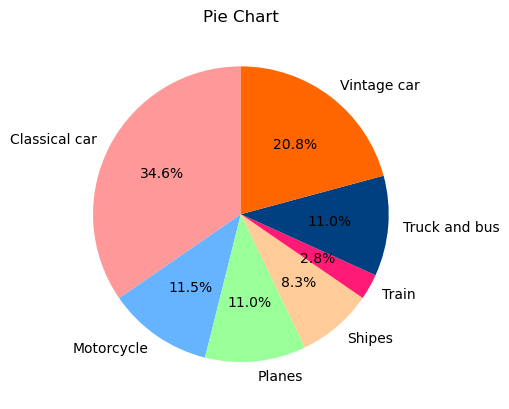

In [51]:
countries = ['Classical car', 'Motorcycle', 'Planes', 'Shipes','Train','Truck and bus','Vintage car']
values = [33373,11080,10636,7989,2712,10579,20059]

plt.pie(values, labels=countries, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff1a75','#004080','#ff6600'])
plt.title('Pie Chart')
plt.show()

In [53]:
total_sale = df["SALES"].sum()
print(total_sale)

9760221.71


In [55]:
total_sale_of_each_vehicle = df.groupby('PRODUCTLINE')['SALES'].sum()
print(total_sale_of_each_vehicle)

PRODUCTLINE
Classic Cars        3842868.54
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Name: SALES, dtype: float64


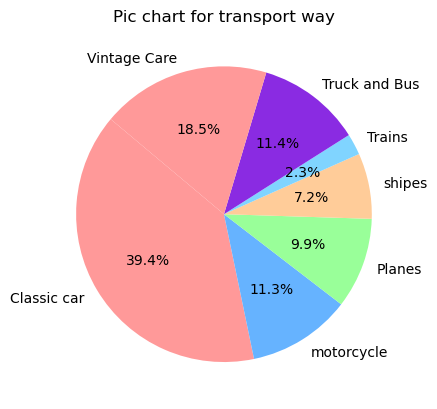

In [57]:
PRODUCTWAY = ['Classic car','motorcycle','Planes','shipes','Trains','Truck and Bus','Vintage Care']
SALES = [3842896,1103522,969325,700049,226239,1111561,1806682]

plt.pie(SALES, labels=PRODUCTWAY, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99','#80d4ff','#8a2be2'])
plt.title('Pic chart for transport way')
plt.show()

In [59]:
mean_value = df['QUANTITYORDERED'].aggregate('mean')
print("Average Quantity Sales in this year :",mean_value)

max_value = df['QUANTITYORDERED'].aggregate('max')
print("Maximum Quantity maximum sales in this year:",max_value)

min_value = df['QUANTITYORDERED'].aggregate('min')
print("Minimum Quantity sales in this year:",min_value)

Average Quantity Sales in this year : 35.10302147797597
Maximum Quantity maximum sales in this year: 97
Minimum Quantity sales in this year: 6


In [61]:
model = LinearRegression()

Quantity = df[['QUANTITYORDERED']]
Sales = df['SALES']

model.fit(Quantity, Sales)

LinearRegression()

In [63]:
max_Quantity = df['QUANTITYORDERED'].aggregate('max')
max_value = df['SALES'].aggregate('max')
price_for_quantity = model.predict([[150]])
print("Maximum quantity Transform in the given year  :",max_Quantity,"__ maximum Salen in the given year:",max_value,"___Predition Sales when quantity increas to 150:", price_for_quantity)

Maximum quantity Transform in the given year  : 97 __ maximum Salen in the given year: 14082.8 ___Predition Sales when quantity increas to 150: [15529.86264591]


C:\Users\sinan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
max_value = df['SALES'].aggregate('max')
print("maximum Salen in this year:",max_value)

maximum Salen in this year: 14082.8


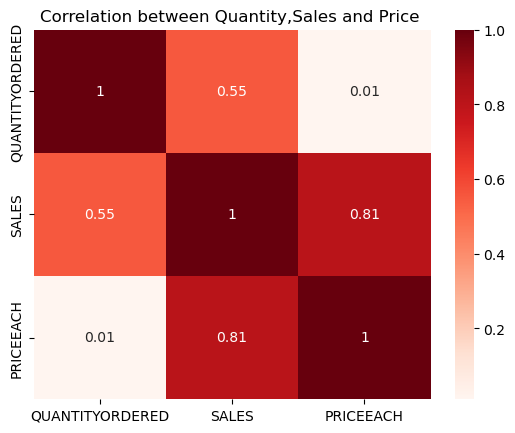

In [67]:
plt.title('Correlation between Quantity,Sales and Price ')
sns.heatmap(data= df[['QUANTITYORDERED', 'SALES', 'PRICEEACH']].corr(), annot= True, cmap='Reds')
plt.show()